In [21]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import datetime, warnings, scipy 
from sklearn import metrics, linear_model


In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights_train = pd.read_csv("flights_train.csv")
flights_test = pd.read_csv("flights_test.csv")

In [8]:
new_data = flights_train

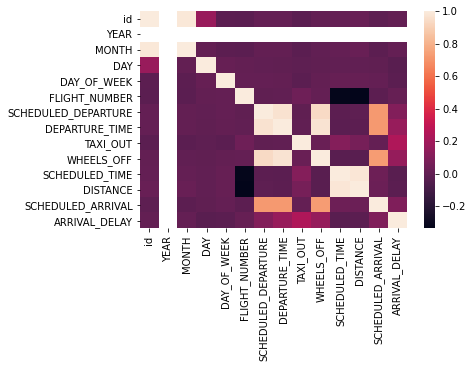

In [5]:
corr = flights_train.corr()
sns.heatmap(corr)

In [9]:
new_data['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [10]:
def format_time(column):
    if pd.isnull(column):
        return np.nan
    else:
        if column == 2400: column = 0
        column = "{0:04d}".format(int(column))
        time = datetime.time(int(column[0:2]), int(column[2:4]))
        return time


def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

    
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(dataframe, col):    
    list_time = []
    for index, columns in dataframe[['DATE', col]].iterrows():    
        if pd.isnull(columns[1]):
            list_time.append(np.nan)
        elif float(columns[1]) == 2400:
            columns[0] += datetime.timedelta(days=1)
            columns[1] = datetime.time(0,0)
            list_time.append(combine_date_time(columns))
        else:
            columns[1] = format_time(columns[1])
            list_time.append(combine_date_time(columns))
    return pd.Series(list_time)

In [11]:
new_data['SCHEDULED_DEPARTURE'] = create_flight_time(new_data, 'SCHEDULED_DEPARTURE')

In [12]:
new_data['DEPARTURE_TIME'] = create_flight_time(new_data, 'DEPARTURE_TIME')

In [13]:
new_data['SCHEDULED_ARRIVAL'] = create_flight_time(new_data, 'SCHEDULED_ARRIVAL')

In [14]:
new_data.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,2015-01-01 23:54:00,21.0,15.0,205.0,1448,2015-01-01 04:30:00,-22.0,2015-01-01
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,2015-01-01 00:02:00,12.0,14.0,280.0,2330,2015-01-01 07:50:00,-9.0,2015-01-01
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,2015-01-01 00:18:00,16.0,34.0,286.0,2296,2015-01-01 08:06:00,5.0,2015-01-01
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,2015-01-01 00:15:00,15.0,30.0,285.0,2342,2015-01-01 08:05:00,-9.0,2015-01-01
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,2015-01-01 00:24:00,11.0,35.0,235.0,1448,2015-01-01 03:20:00,-21.0,2015-01-01


In [15]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats = new_data['ARRIVAL_DELAY'].groupby(new_data['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-78.0,651.0,28815.0,4.712407
HA,-59.0,1467.0,37635.0,2.402099
F9,-49.0,1101.0,42287.0,18.127108
NK,-59.0,833.0,54239.0,17.582256
AS,-82.0,950.0,82850.0,-1.104695
B6,-76.0,952.0,127305.0,6.968689
MQ,-63.0,1152.0,149746.0,11.815074
US,-87.0,750.0,194223.0,3.706209
UA,-81.0,1294.0,244880.0,7.915853


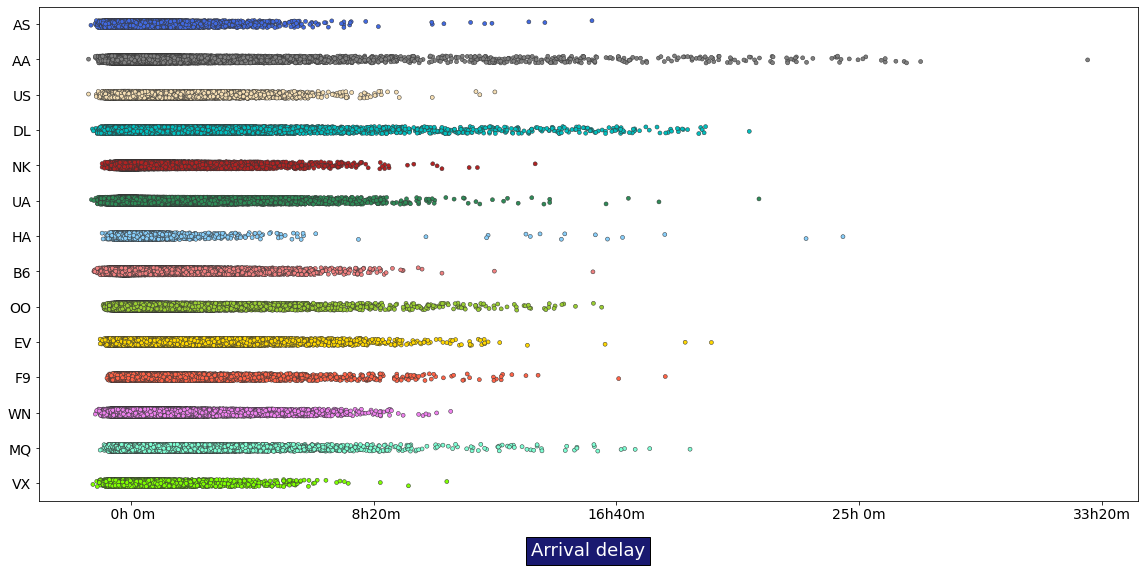

In [20]:
from matplotlib.gridspec import GridSpec

delays = new_data.loc[:, ['AIRLINE', 'ARRIVAL_DELAY']]

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)
ax3=fig.add_subplot(gs[1,:]) 



ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors,
                    data=delays, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Arrival delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 

In [17]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()


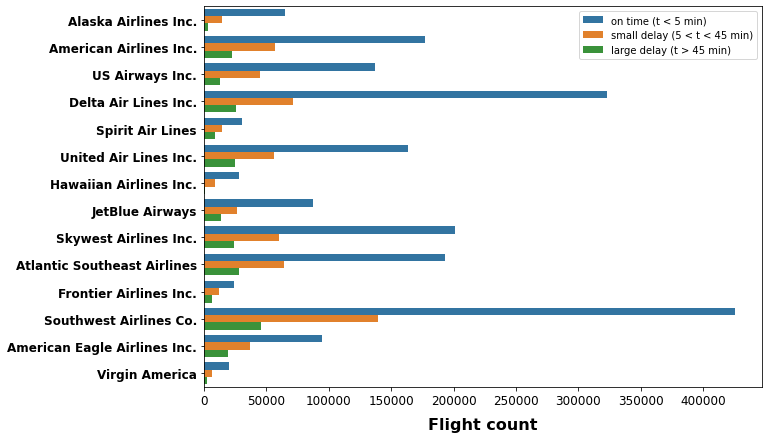

In [18]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
new_data['DELAY_LEVEL'] = new_data['ARRIVAL_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=new_data)

# Replace the abbreviations with the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()